<a href="https://colab.research.google.com/github/juliano-fc/Airbnb/blob/main/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Barcelona*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Barcelona, e ver quais insights podem ser extraídos a partir de dados brutos.**

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

## Obtenção dos Dados
Todos os dados usados aqui foram obtidos a partir do site Inside Airbnb.

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

listings.csv - Summary information and metrics for listings in Barcelona (good for visualisations).

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o conjunto de dados exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import seaborn as sns
from pyproj import CRS

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/listings.csv")
data.drop("neighbourhood_group",axis = 1,inplace = True)

## Análise dos Dados


In [8]:
data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17475,Rental unit in 08013 Barcelona · ★4.40 · 1 bed...,65623,Luca,la Dreta de l'Eixample,41.399390,2.17044,Entire home/apt,140.0,5,26,2023-12-04,0.16,1,32,9,NaN
1,18674,Rental unit in Barcelona · ★4.33 · 3 bedrooms ...,71615,Mireia Maria,la Sagrada Família,41.405560,2.17262,Entire home/apt,121.0,1,40,2023-11-07,0.31,30,39,7,HUTB-002062
2,198958,Rental unit in Barcelona · ★4.69 · 4 bedrooms ...,971768,Laura,Diagonal Mar i el Front Marítim del Poblenou,41.408050,2.21487,Entire home/apt,304.0,2,105,2023-10-16,0.74,9,137,26,HUTB-000926
3,23197,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Etain (Marnie),el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,200.0,3,75,2023-11-25,0.48,2,300,11,HUTB005057
4,32711,Rental unit in Barcelona · ★4.48 · 2 bedrooms ...,135703,Nick,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,79.0,1,99,2023-10-18,0.66,3,297,16,HUTB-001722


In [9]:
data.loc[data.neighbourhood == "la Marina del Prat Vermell"].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.000000e+00,6.000000e+00,6.000000,6.000000,4.000000,6.000000,6.000000,1.00,6.000000,6.000000,6.000000
mean,5.655468e+17,9.203178e+07,41.358897,2.155949,190.000000,18.333333,12.833333,0.61,10.333333,212.500000,1.500000
std,4.712446e+17,1.605119e+08,0.009076,0.015463,59.143892,14.320149,31.435118,NaN,12.355835,169.366762,3.674235
min,1.410802e+06,4.805280e+05,41.352720,2.144207,107.000000,3.000000,0.000000,0.61,1.000000,0.000000,0.000000
25%,1.626437e+17,3.088159e+06,41.352795,2.145013,176.750000,6.250000,0.000000,0.61,1.000000,65.750000,0.000000
50%,6.541539e+17,1.296119e+07,41.353388,2.147846,203.000000,18.500000,0.000000,0.61,4.000000,275.000000,0.000000
75%,9.462960e+17,9.294018e+07,41.365702,2.168517,216.250000,31.500000,0.000000,0.61,21.250000,341.750000,0.000000
max,1.042489e+18,4.063908e+08,41.371480,2.176320,247.000000,32.000000,77.000000,0.61,26.000000,365.000000,9.000000


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [10]:
data.shape

(18321, 17)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18321 entries, 0 to 18320
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18321 non-null  int64  
 1   name                            18321 non-null  object 
 2   host_id                         18321 non-null  int64  
 3   host_name                       18319 non-null  object 
 4   neighbourhood                   18321 non-null  object 
 5   latitude                        18321 non-null  float64
 6   longitude                       18321 non-null  float64
 7   room_type                       18321 non-null  object 
 8   price                           16056 non-null  float64
 9   minimum_nights                  18321 non-null  int64  
 10  number_of_reviews               18321 non-null  int64  
 11  last_review                     13952 non-null  object 
 12  reviews_per_month               

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [12]:
((data.isna().sum()/data.shape[0])*100).map(lambda x: f"{x:.2f} %")


id                                 0.00 %
name                               0.00 %
host_id                            0.00 %
host_name                          0.01 %
neighbourhood                      0.00 %
latitude                           0.00 %
longitude                          0.00 %
room_type                          0.00 %
price                             12.36 %
minimum_nights                     0.00 %
number_of_reviews                  0.00 %
last_review                       23.85 %
reviews_per_month                 23.85 %
calculated_host_listings_count     0.00 %
availability_365                   0.00 %
number_of_reviews_ltm              0.00 %
license                           32.30 %
dtype: object

### **Q3. Qual o tipo de distribuição das variáveis?**

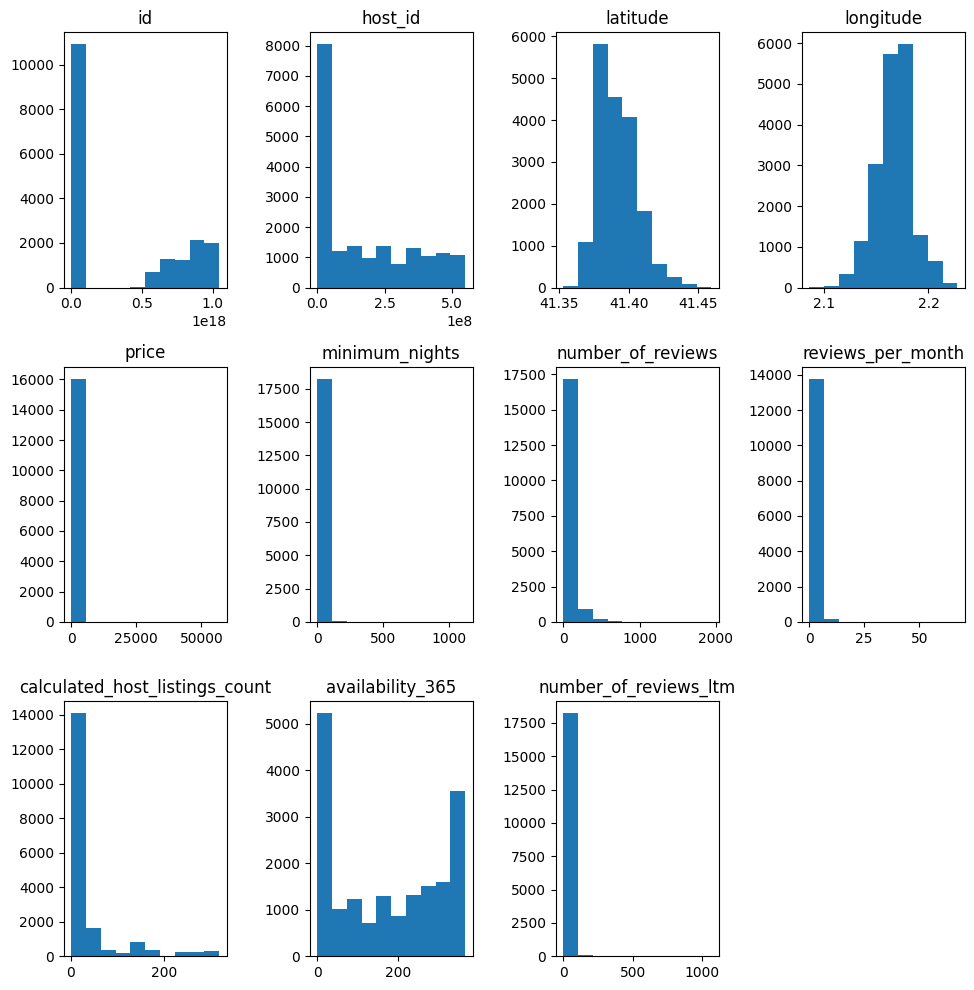

In [13]:
# plotar o histograma das variáveis numéricas
numeric = data.select_dtypes(include=np.number).columns
linhas = 4
cont = 0
fig,ax = plt.subplots(3,4,figsize=(10,10))
for i in range(0,3):
  for j in range(0,4):
    if i==2 and j==3:
      break
    else:
      ax[i][j].hist(data[numeric[cont]])
      ax[i][j].set_title(numeric[cont])
      cont = cont+1
fig.tight_layout()
ax[2][3].spines[['right', 'top','left','bottom']].set_visible(False)
ax[2][3].set_axis_off()



id : int64
host_id : int64
latitude : float64
longitude : float64
price : float64
minimum_nights : int64
number_of_reviews : int64
reviews_per_month : float64
calculated_host_listings_count : int64
availability_365 : int64
number_of_reviews_ltm : int64


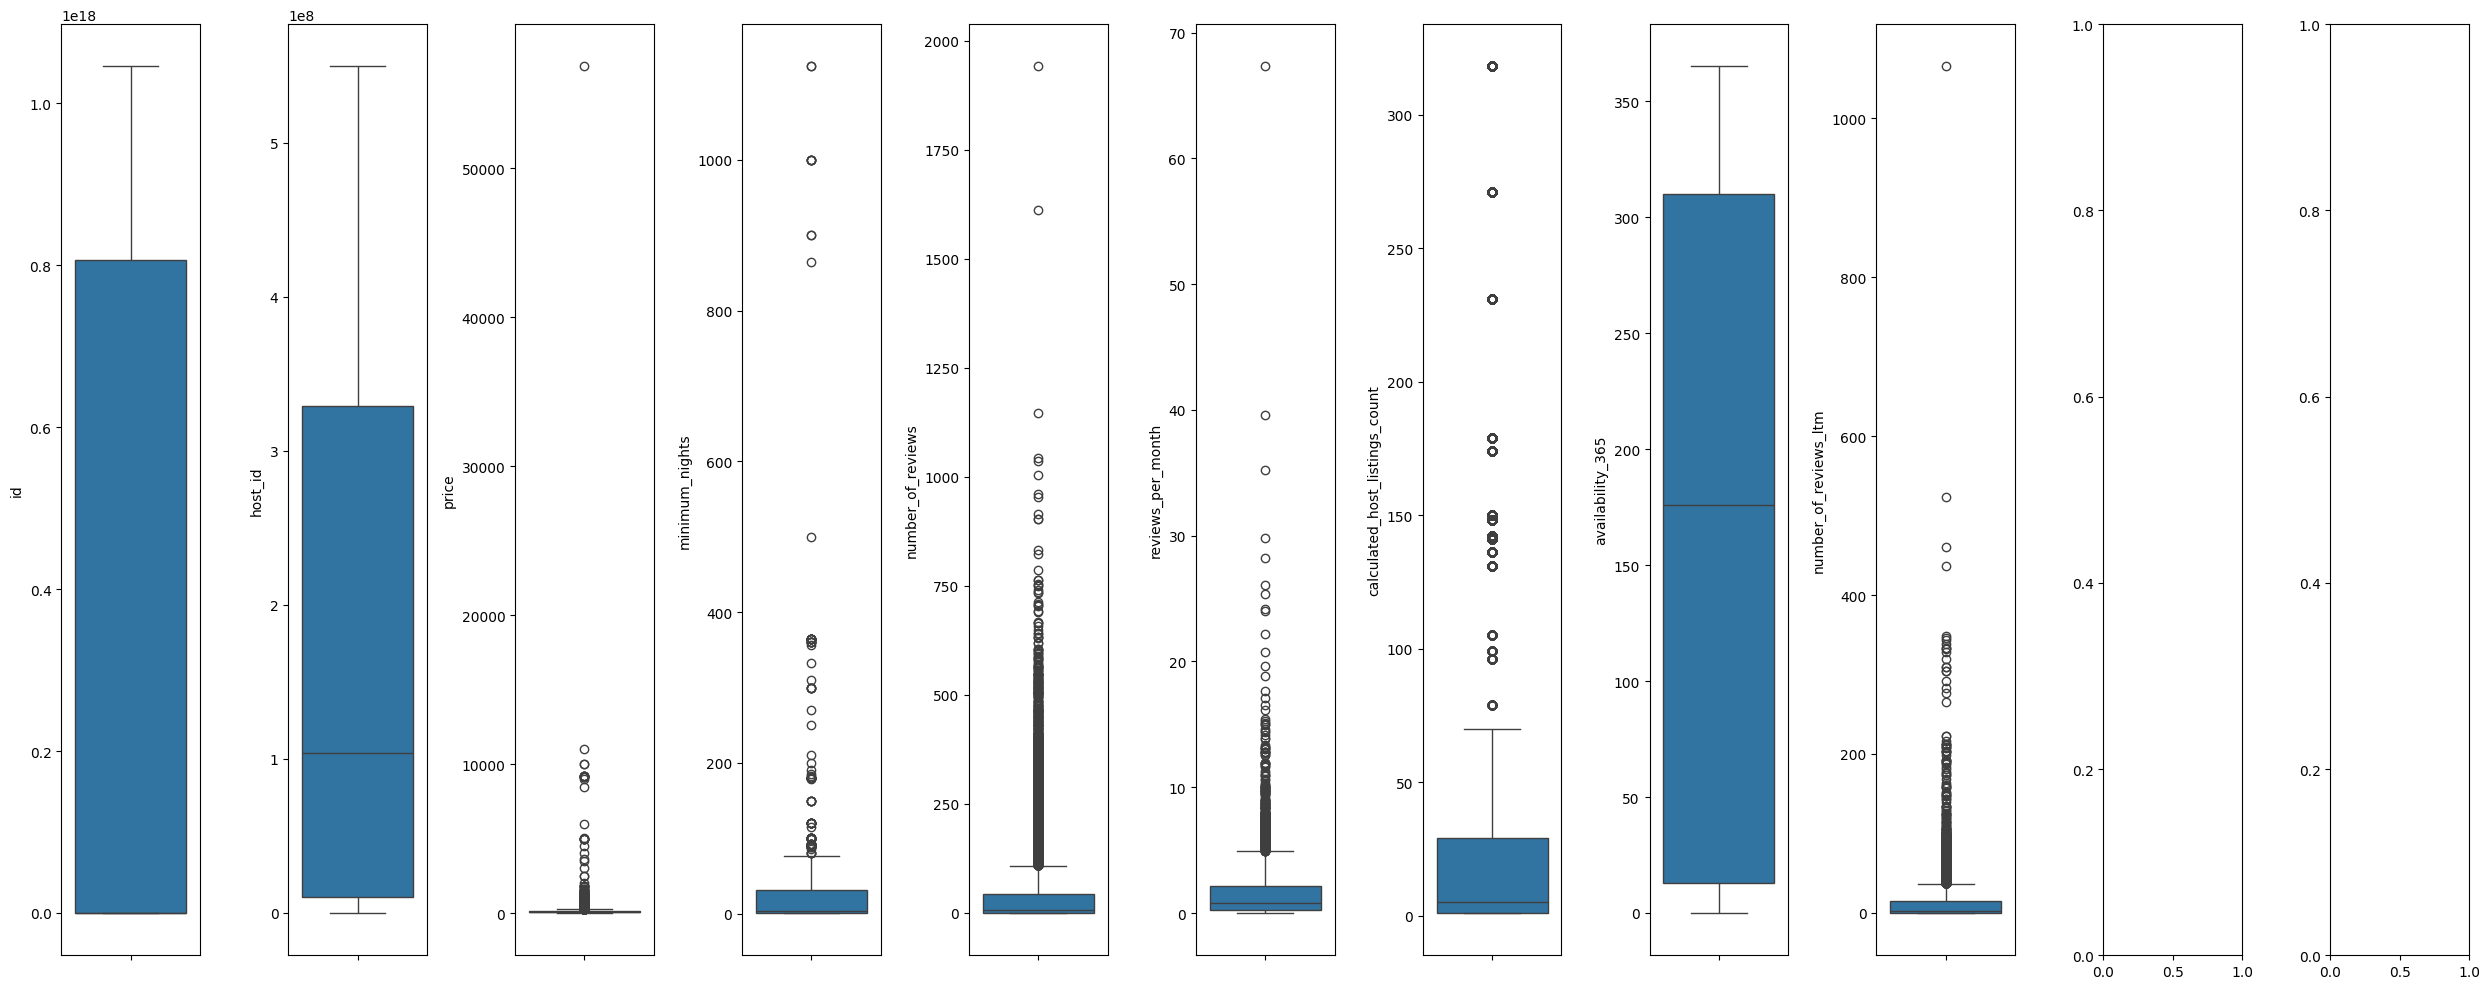

In [14]:
variaveis_numericas = []
for i in data.columns[0:17].tolist():
  if data.dtypes[i] == 'int64' or data.dtypes[i] =='float64':
    print(i,":",data.dtypes[i])
    variaveis_numericas.append(i)

variaveis_numericas.remove("latitude")
variaveis_numericas.remove("longitude")

fig,ax = plt.subplots(1,11,figsize=(25,10))

coluna = 0
for i in variaveis_numericas:
  sns.boxplot(ax = ax[coluna],data = data,y=i)
  coluna = coluna +1
fig.tight_layout()


In [15]:
data[numeric].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.832100e+04,1.832100e+04,18321.000000,18321.000000,16056.000000,18321.000000,18321.000000,13952.000000,18321.000000,18321.000000,18321.000000
mean,3.370245e+17,1.723186e+08,41.391914,2.166945,126.494083,14.865892,43.864309,1.443145,33.812838,171.187381,11.819933
std,4.184948e+17,1.766263e+08,0.014042,0.017454,548.481873,31.514680,89.887244,1.894793,66.230543,136.551292,23.855482
min,1.747500e+04,3.073000e+03,41.352720,2.085593,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.239606e+07,1.023157e+07,41.381010,2.156690,50.000000,1.000000,1.000000,0.240000,1.000000,13.000000,0.000000
50%,4.638623e+07,1.038178e+08,41.389521,2.168030,87.000000,3.000000,7.000000,0.830000,5.000000,176.000000,2.000000
75%,8.064681e+17,3.289379e+08,41.401320,2.177490,130.000000,31.000000,44.000000,2.122500,29.000000,310.000000,15.000000
max,1.045480e+18,5.496387e+08,41.459560,2.227710,56815.000000,1124.000000,1941.000000,67.300000,318.000000,365.000000,1065.000000


### **Q4. Há *outliers* presentes?**



In [16]:

Q1 = data[variaveis_numericas].quantile(0.25)
Q3 = data[variaveis_numericas].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR


for i in variaveis_numericas:
  data[i] = np.where((data[i]<lower_bound[i]) | (data[i]>upper_bound[i]),np.nan,data[i])

((data.isna().sum()/data.shape[0])*100).map(lambda x: f"{x:.2f} %")

id                                 0.00 %
name                               0.00 %
host_id                            0.00 %
host_name                          0.01 %
neighbourhood                      0.00 %
latitude                           0.00 %
longitude                          0.00 %
room_type                          0.00 %
price                             17.68 %
minimum_nights                     0.96 %
number_of_reviews                 12.49 %
last_review                       23.85 %
reviews_per_month                 26.66 %
calculated_host_listings_count    13.10 %
availability_365                   0.00 %
number_of_reviews_ltm             10.64 %
license                           32.30 %
dtype: object

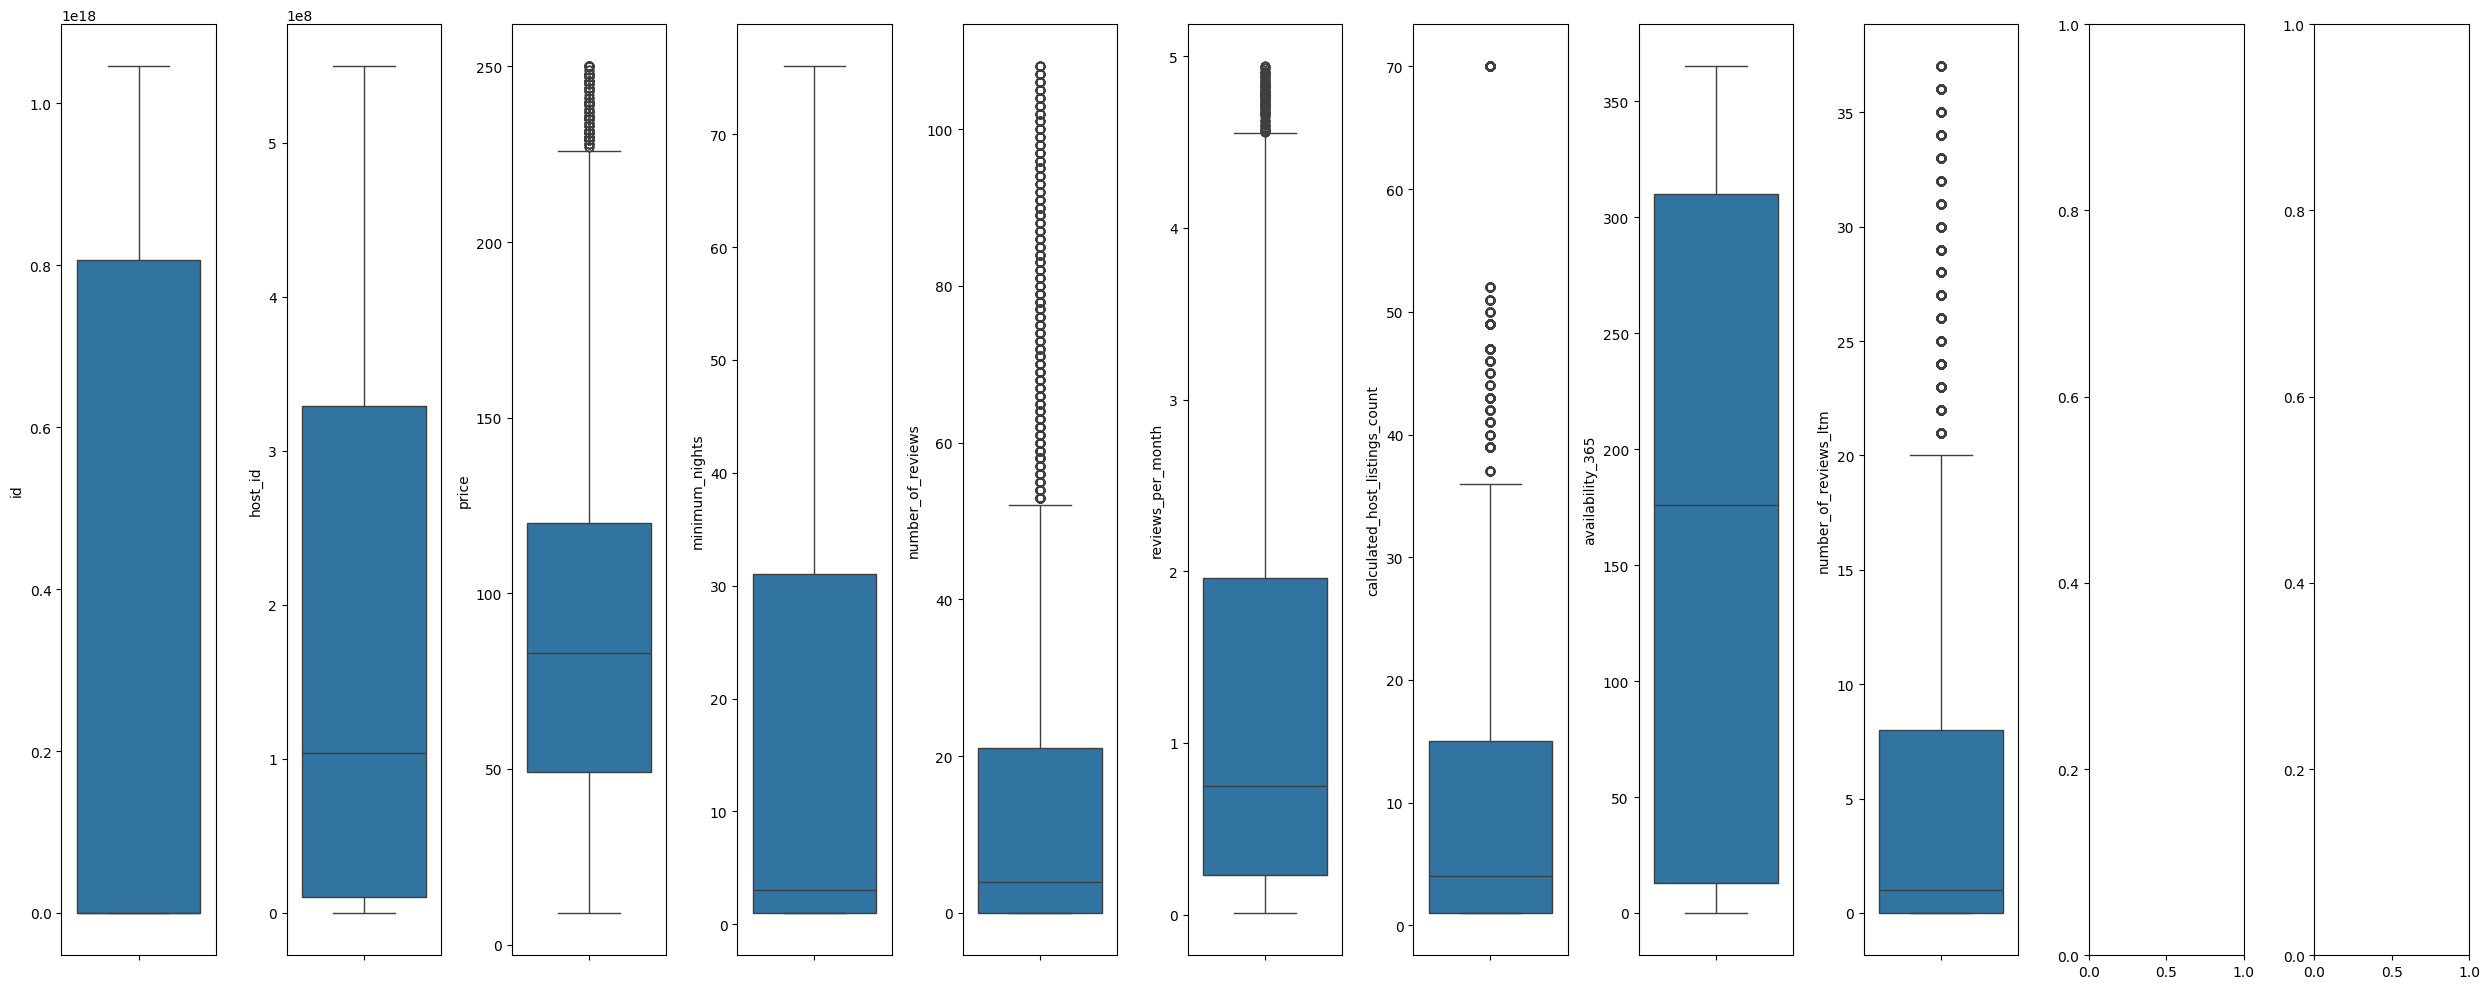

In [17]:
fig,ax = plt.subplots(1,11,figsize=(25,10))
coluna = 0
for i in variaveis_numericas:
  sns.boxplot(ax = ax[coluna],data = data,y=i)
  coluna = coluna +1
fig.tight_layout()

### **Q5. Qual a média dos preços de aluguel?**

In [18]:
# ver a média da coluna `price``
data["price"].mean()

90.42454581620474

### **Q6. Qual a correlação existente entre as variáveis**

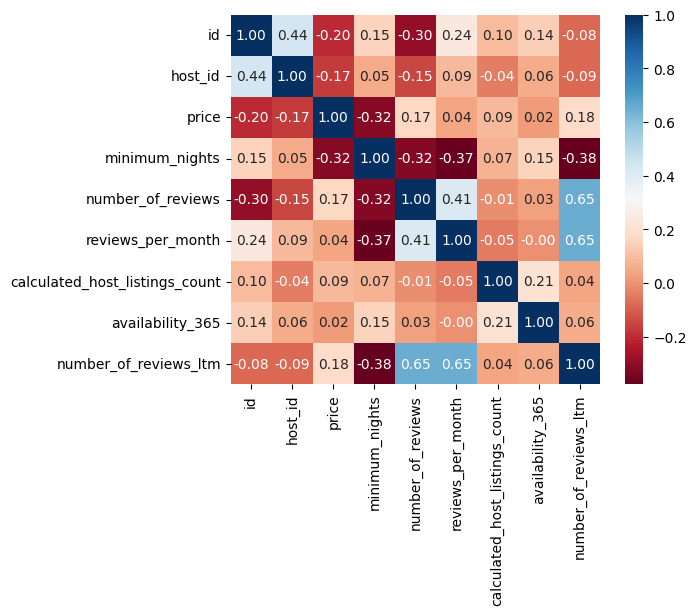

In [19]:
corr = data[variaveis_numericas].corr()
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

In [20]:
data.groupby('room_type')['id'].nunique().sort_values(ascending = False)

room_type
Entire home/apt    10751
Private room        7275
Shared room          161
Hotel room           134
Name: id, dtype: int64

In [21]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(data.groupby('room_type')['id'].nunique()/len(data)).map(lambda x:f"{x*100:.2f} %")


room_type
Entire home/apt    58.68 %
Hotel room          0.73 %
Private room       39.71 %
Shared room         0.88 %
Name: id, dtype: object

### **Q7. Qual a localidade mais cara do dataset?**



In [22]:
# importando o mapa da cidade de barcelona
barcelona2 = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/Barcelona/0301040100_Barris_UNITATS_ADM.shp" )

In [23]:
# verificando as coordenadas em que se encontra o arquivo
barcelona2.crs

<Projected CRS: EPSG:25831>
Name: ETRS89 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 0°E and 6°E: Andorra; Belgium - onshore and offshore; Denmark - offshore; Germany - offshore; Jan Mayen - offshore; Norway including Svalbard - onshore and offshore; Spain - onshore and offshore.
- bounds: (0.0, 37.0, 6.01, 82.45)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [24]:
target_crs = CRS.from_epsg(4326)
# Essa linha de código está utilizando uma biblioteca chamada Pyproj, que
# usada para trabalhar com projeções cartográficas e transformações de coordenadas.
# A função from_epsg é usada para criar um objeto CRS com base no código EPSG.
# Ao passar 4326 como argumento para from_epsg, estamos criando um objeto CRS que representa o sistema de coordenadas WGS 84, a mesma
# em que se encontra as coordenadas dos dados do AirBnb.
barcelona2 = barcelona2.to_crs(target_crs)
# verificando as novas coordenadas
barcelona2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

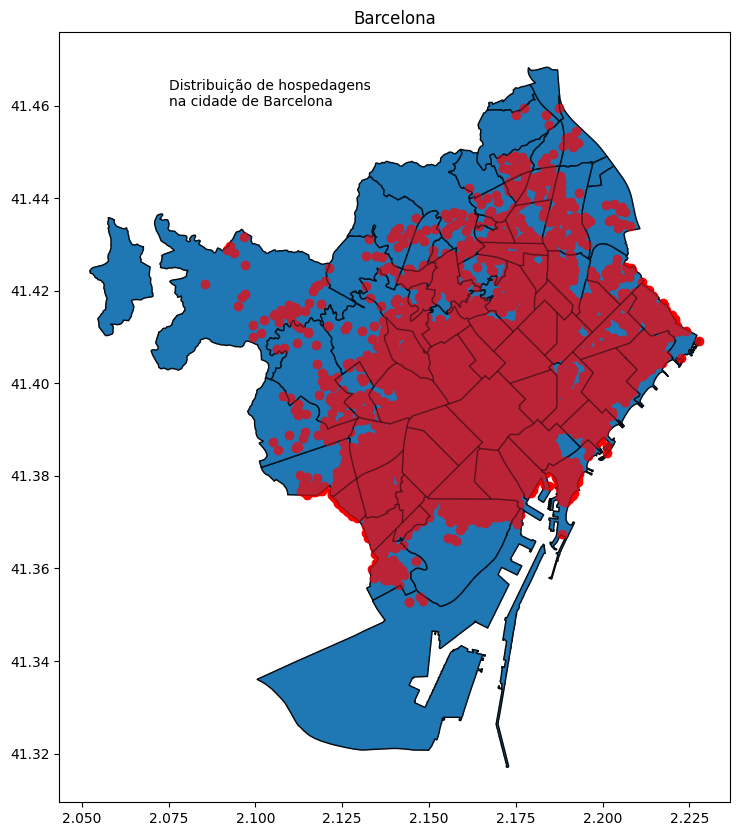

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
barcelona2.plot(ax =ax,edgecolor='black')
ax.scatter(x = data["longitude"],y=data["latitude"],c="red")
barcelona2.plot(ax=ax,edgecolor='black',alpha=0.3);
ax.set_title("Barcelona")
ax.text(2.075,41.46,"Distribuição de hospedagens \nna cidade de Barcelona ");



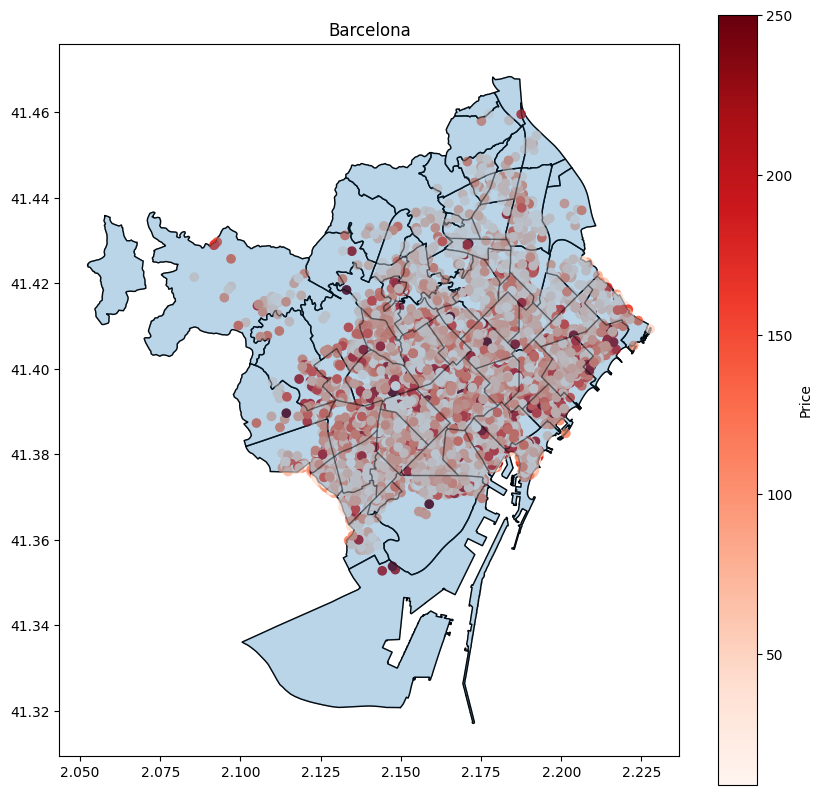

In [42]:
fig, ax = plt.subplots(figsize=(10,10))
barcelona2.plot(ax =ax,edgecolor='black',color="white")
scatter = ax.scatter(x=data["longitude"],y=data["latitude"],c = data["price"],cmap="Reds");
barcelona2.plot(ax=ax,edgecolor='black',alpha=0.3);
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Price')
ax.set_title("Barcelona");



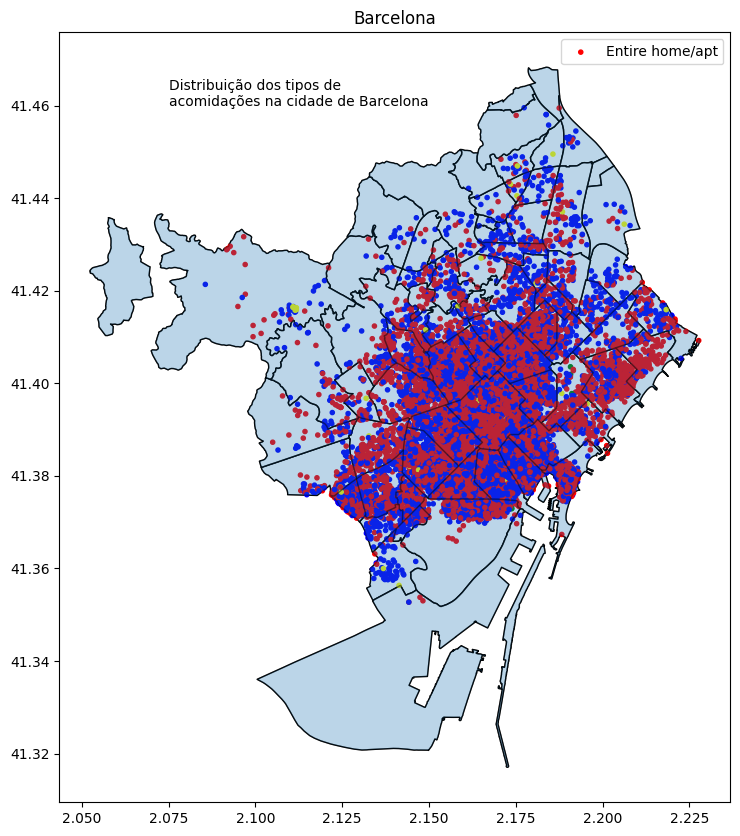

In [44]:
aa = data.loc[data.neighbourhood =="la Marina del Prat Vermell" ]
aa.head()
colors = {'Entire home/apt':'red', 'Hotel room':'green', 'Private room':'blue', 'Shared room':'yellow'}

fig, ax = plt.subplots(figsize=(10,10))
barcelona2.plot(ax =ax,edgecolor='black',color="white")
ax.scatter(x=data["longitude"],y=data["latitude"],c = data["room_type"].map(colors),s=9)
barcelona2.plot(ax=ax,edgecolor='black',alpha=0.3);
ax.set_title("Barcelona");
ax.text(2.075,41.46,"Distribuição dos tipos de \nacomidações na cidade de Barcelona");
plt.legend(data["room_type"],bbox_to_anchor=(1,1))




In [28]:
data.groupby("neighbourhood")["price"].mean().sort_values(ascending=False)

neighbourhood
la Marina del Prat Vermell                      190.000000
Vallbona                                        174.000000
Diagonal Mar i el Front Marítim del Poblenou    119.354167
la Vila Olímpica del Poblenou                   118.798165
la Dreta de l'Eixample                          113.894970
                                                   ...    
Can Peguera                                      43.000000
Canyelles                                        40.000000
la Trinitat Vella                                37.500000
la Clota                                         31.000000
el Turó de la Peira                              27.954545
Name: price, Length: 71, dtype: float64

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém percebe-se que Barcelona se trata de uma cidade bastante homogenea no que diz respeito a hospendagens. Não há uma variação significativa na cidade quanto ao tipo de hospedagem e nem preço. Com exceção da região próximo a fronteira, onde há poucas acomodações.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.

